<a href="https://colab.research.google.com/github/eva-vision/Dmlab_Dataracing_Gradient_Boosting/blob/main/Dmlab_Dataracing_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Dec  2 11:19:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab.data_table import DataTable
DataTable.max_columns = 300
DataTable.max_rows = 50000000


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
subm = pd.read_csv("data_submission_example.csv")

In [ ]:
subm = subm.drop('PRED', axis=1)

In [ ]:
subm

,BORROWER_ID
0,+++b/oYx
1,+++pcjqH
2,+++ukYrT
3,+++wvYn7
4,++/6JzSJ
...,...
1117669,zzzAk2cT
1117670,zzzUlMwd
1117671,zzzf5tKU
1117672,zzzjSsQj


In [ ]:
origdf = pd.read_csv("training_data.csv")

In [ ]:
origdf

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,NaN,479a2e13,NaN,...,1.00,NaN,1217.0,98.0,98.0,20.0,A,NaN,-,NaN
1,EtIEHrcH,lrdxML0g,1d42bbf5,NaN,0.0,31,2457036,NaN,479a2e13,NaN,...,74.17,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
2,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,...,74.77,100003.0,1199.0,98.0,98.0,179.0,A,7.0,-,NaN
3,2NLT774,MMkJ8z/e,1d42bbf5,NaN,0.0,31,2457038,NaN,479a2e13,NaN,...,0.99,NaN,1221.0,98.0,98.0,NaN,A,NaN,-,NaN
4,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,NaN,479a2e13,NaN,...,74.30,100002.0,1260.0,98.0,98.0,178.0,A,1.0,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602748,5B25613A,Z9fieAgO,f789f8b0,NaN,NaN,31,2457738,NaN,2f88e16c,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
1602749,947A5B38,26ZlUKOa,f789f8b0,NaN,NaN,31,2457523,NaN,2f88e16c,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
1602750,947A5B38,Dxng1cGs,f789f8b0,NaN,NaN,31,2457523,NaN,2f88e16c,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN,-,NaN
1602751,46115AEC,Ggu/Vok7,f789f8b0,NaN,NaN,31,2457407,NaN,2f88e16c,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN


In [ ]:
df = origdf.copy()

##Set date

In [ ]:
offset = df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].min()-1
offset

2457023

In [ ]:
df['CONTRACT_DATE_OF_LOAN_AGREEMENT']=df['CONTRACT_DATE_OF_LOAN_AGREEMENT']-offset

In [ ]:
df['TARGET_EVENT_DAY']=df['TARGET_EVENT_DAY']-offset

In [ ]:
df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].max()

1095

In [ ]:
df['CONTRACT_MATURITY_DATE']=df['CONTRACT_MATURITY_DATE']-offset

In [ ]:
df['CONTRACT_MATURITY_DATE'].min()

6

##Small dataset

In [ ]:
# Smaller Dataset for testing
df_10000_rows = origdf.head(10000)

# Save to a new CSV file
df_10000_rows.to_csv('df_10000_rows.csv', index=False)


In [ ]:
df_10000_rows

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,NaN,479a2e13,NaN,...,1.00,NaN,1217.0,98.0,98.0,20.0,A,NaN,-,NaN
1,EtIEHrcH,lrdxML0g,1d42bbf5,NaN,0.0,31,2457036,NaN,479a2e13,NaN,...,74.17,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
2,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,...,74.77,100003.0,1199.0,98.0,98.0,179.0,A,7.0,-,NaN
3,2NLT774,MMkJ8z/e,1d42bbf5,NaN,0.0,31,2457038,NaN,479a2e13,NaN,...,0.99,NaN,1221.0,98.0,98.0,NaN,A,NaN,-,NaN
4,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,NaN,479a2e13,NaN,...,74.30,100002.0,1260.0,98.0,98.0,178.0,A,1.0,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,XwiQz+wI,hEvkp8vK,caa130b5,2.0,59765.0,31,2457974,44.54,479a2e13,185232.0,...,39.64,100003.0,1209.0,98.0,98.0,127.0,A,3.0,-,NaN
9996,tmR6dvJ+,A+RNidp7,caa130b5,1.0,363.0,31,2457983,19.65,479a2e13,124422.0,...,51.63,100003.0,1229.0,98.0,98.0,193.0,A,3.0,-,NaN
9997,uJM23Ax,1tKjqJ9J,caa130b5,2.0,21574.0,31,2457974,46.89,479a2e13,376893.0,...,26.66,100003.0,1255.0,425.0,98.0,122.0,A,2.0,-,NaN
9998,uJM23Ax,Ga6uel1t,caa130b5,2.0,21574.0,31,2457974,46.89,479a2e13,376893.0,...,26.66,100003.0,1255.0,425.0,98.0,122.0,B,2.0,-,NaN


##Data Review and Modification

In [ ]:
df['CONTRACT_ID'].isna().any() #---

False

In [ ]:
df['BORROWER_ID'].isna().any() #---

False

In [ ]:
df = df.drop('CONTRACT_BANK_ID', axis=1) #Bank fraud not assumed

In [ ]:
df['CONTRACT_CREDIT_INTERMEDIARY'].value_counts(dropna = False) #dummyba 5

2.0        1069644
1.0         454073
NaN          59422
20001.0      18654
0.0            960
Name: CONTRACT_CREDIT_INTERMEDIARY, dtype: int64

In [ ]:
dummies = pd.get_dummies(df['CONTRACT_CREDIT_INTERMEDIARY'], prefix='INTERMEDIARY')

df = pd.concat([df, dummies], axis=1)

df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,CONTRACT_INSTALMENT_AMOUNT,...,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY,INTERMEDIARY_0.0,INTERMEDIARY_1.0,INTERMEDIARY_2.0,INTERMEDIARY_20001.0
0,TpK8osXs,d8SqtuEV,2.0,0.0,31,29,NaN,479a2e13,NaN,9545.0,...,98.0,20.0,A,NaN,-,NaN,0,0,1,0
1,EtIEHrcH,lrdxML0g,NaN,0.0,31,13,NaN,479a2e13,NaN,9528.0,...,NaN,NaN,A,NaN,-,NaN,0,0,0,0
2,1G10DfKj,gII7nnq4,2.0,16350.0,31,20,7.05,479a2e13,127305.0,8899.0,...,98.0,179.0,A,7.0,-,NaN,0,0,1,0
3,2NLT774,MMkJ8z/e,NaN,0.0,31,15,NaN,479a2e13,NaN,14329.0,...,98.0,NaN,A,NaN,-,NaN,0,0,0,0
4,VpylRvay,M417onFP,2.0,2395.0,31,68,NaN,479a2e13,NaN,4003.0,...,98.0,178.0,A,1.0,-,NaN,0,0,1,0
5,5tsDwTjS,u9GRAuen,2.0,0.0,31,70,NaN,479a2e13,NaN,11214.0,...,98.0,NaN,A,NaN,-,NaN,0,0,1,0
6,drZAWXaR,XPWFcJZI,NaN,0.0,31,72,33.94,479a2e13,172647.0,10933.0,...,NaN,NaN,A,NaN,-,NaN,0,0,0,0
7,ebtK6u+,L2Nu2zZe,2.0,0.0,31,23,NaN,479a2e13,NaN,11405.0,...,98.0,4.0,A,NaN,-,NaN,0,0,1,0
8,ffJh4MY,5A0GWOi2,2.0,0.0,31,26,NaN,479a2e13,NaN,6045.0,...,98.0,NaN,A,NaN,-,NaN,0,0,1,0
9,eo09vYuo,lqPGd2+x,2.0,0.0,31,58,NaN,479a2e13,NaN,10431.0,...,98.0,3.0,A,NaN,-,NaN,0,0,1,0


In [ ]:
df = df.drop('CONTRACT_CREDIT_INTERMEDIARY', axis=1)

In [ ]:
df['CONTRACT_CREDIT_LOSS'].isna().any() #normalizál 0 –> 72113003.0

True

In [ ]:
df['CONTRACT_CREDIT_LOSS'].isna().sum()

36154

In [ ]:
df['CONTRACT_CREDIT_LOSS'] = df['CONTRACT_CREDIT_LOSS'].fillna(0)

In [ ]:
df = df.drop('CONTRACT_CURRENCY', axis=1) #2 of 3 values used only 62/1600000 times -> not used

In [ ]:
df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].max() #normalizál 1 –> 1095

1095

In [ ]:
df['CONTRACT_DEPT_SERVICE_TO_INCOME'].isna().any() #normalizál    0 –> 87615.27

True

In [ ]:
df['CONTRACT_DEPT_SERVICE_TO_INCOME'].isna().sum()

201480

In [ ]:
df['CONTRACT_DEPT_SERVICE_TO_INCOME'].value_counts(dropna = False)

NaN       201480
0.00       37284
49.46        646
49.43        629
49.47        625
           ...  
82.06          1
66.51          1
171.89         1
93.07          1
112.13         1
Name: CONTRACT_DEPT_SERVICE_TO_INCOME, Length: 11368, dtype: int64

In [ ]:
df['CONTRACT_DEPT_SERVICE_TO_INCOME'] = df['CONTRACT_DEPT_SERVICE_TO_INCOME'].fillna(0)

In [ ]:
df['CONTRACT_FREQUENCY_TYPE'].isna().any()

False

In [ ]:
df['CONTRACT_FREQUENCY_TYPE'].value_counts(dropna = False) #dummyba, 8 érték

479a2e13    1477500
2f88e16c      58702
87db11f5      47152
3265c5b7      17386
ad534644       1616
89efd382        337
2aebe4cb         53
bd092d5a          7
Name: CONTRACT_FREQUENCY_TYPE, dtype: int64

In [ ]:
dummies = pd.get_dummies(df['CONTRACT_FREQUENCY_TYPE'], prefix='FREQUENCY_TYPE')

df = pd.concat([df, dummies], axis=1)

df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_CREDIT_LOSS,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,CONTRACT_INSTALMENT_AMOUNT,CONTRACT_INSTALMENT_AMOUNT_2,CONTRACT_INTEREST_PERIOD,...,INTERMEDIARY_2.0,INTERMEDIARY_20001.0,FREQUENCY_TYPE_2aebe4cb,FREQUENCY_TYPE_2f88e16c,FREQUENCY_TYPE_3265c5b7,FREQUENCY_TYPE_479a2e13,FREQUENCY_TYPE_87db11f5,FREQUENCY_TYPE_89efd382,FREQUENCY_TYPE_ad534644,FREQUENCY_TYPE_bd092d5a
0,TpK8osXs,d8SqtuEV,0.0,29,0.00,479a2e13,NaN,9545.0,11059.0,NaN,...,1,0,0,0,0,1,0,0,0,0
1,EtIEHrcH,lrdxML0g,0.0,13,0.00,479a2e13,NaN,9528.0,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
2,1G10DfKj,gII7nnq4,16350.0,20,7.05,479a2e13,127305.0,8899.0,8880.0,50.0,...,1,0,0,0,0,1,0,0,0,0
3,2NLT774,MMkJ8z/e,0.0,15,0.00,479a2e13,NaN,14329.0,12966.0,NaN,...,0,0,0,0,0,1,0,0,0,0
4,VpylRvay,M417onFP,2395.0,68,0.00,479a2e13,NaN,4003.0,3901.0,37.0,...,1,0,0,0,0,1,0,0,0,0
5,5tsDwTjS,u9GRAuen,0.0,70,0.00,479a2e13,NaN,11214.0,10727.0,NaN,...,1,0,0,0,0,1,0,0,0,0
6,drZAWXaR,XPWFcJZI,0.0,72,33.94,479a2e13,172647.0,10933.0,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
7,ebtK6u+,L2Nu2zZe,0.0,23,0.00,479a2e13,NaN,11405.0,11423.0,NaN,...,1,0,0,0,0,1,0,0,0,0
8,ffJh4MY,5A0GWOi2,0.0,26,0.00,479a2e13,NaN,6045.0,6008.0,NaN,...,1,0,0,0,0,1,0,0,0,0
9,eo09vYuo,lqPGd2+x,0.0,58,0.00,479a2e13,NaN,10431.0,10420.0,NaN,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
df = df.drop('FREQUENCY_TYPE_bd092d5a', axis=1)

In [ ]:
df = df.drop('CONTRACT_FREQUENCY_TYPE', axis=1)

In [ ]:
df['CONTRACT_INCOME'].isna().any() #normalizál    0 –> 101595432668.0


True

In [ ]:
df['CONTRACT_INCOME'].isna().sum() #normalizál

198022

In [ ]:
df['CONTRACT_INCOME'].median() #normalizál

204659.0

In [ ]:
df['CONTRACT_INCOME'] = df['CONTRACT_INCOME'].fillna(204659)

In [ ]:
df['CONTRACT_INSTALMENT_AMOUNT'].isna().any() #normalizál    0 –> 30228261.0


True

In [ ]:
df['CONTRACT_INSTALMENT_AMOUNT'].isna().sum() ## Not used

1314531

In [ ]:
df = df.drop('CONTRACT_INSTALMENT_AMOUNT', axis=1)

In [ ]:
df['CONTRACT_INSTALMENT_AMOUNT_2'].isna().any() #normalizál    0 –> 295949932.0


True

In [ ]:
df['CONTRACT_INSTALMENT_AMOUNT_2'].isna().sum() ## Not used

42438

In [ ]:
df = df.drop('CONTRACT_INSTALMENT_AMOUNT_2', axis=1)

In [ ]:
df['CONTRACT_INTEREST_PERIOD'].isna().any() #normalizál    0 –> 9999


True

In [ ]:
df['CONTRACT_INTEREST_PERIOD'].isna().sum()

371312

In [ ]:
df['CONTRACT_INTEREST_PERIOD'].mean()

120.20276326677445

In [ ]:
df['CONTRACT_INTEREST_PERIOD'].value_counts() ## Not used

0.0       199656
61.0      128860
3.0       119537
12.0       70644
85.0       66000
           ...  
1400.0         1
1474.0         1
796.0          1
448.0          1
1052.0         1
Name: CONTRACT_INTEREST_PERIOD, Length: 1038, dtype: int64

In [ ]:
df = df.drop('CONTRACT_INTEREST_PERIOD', axis=1)

In [ ]:
df['CONTRACT_INTEREST_RATE'].isna().any() #normalizál    0 –> 95.32


True

In [ ]:
df['CONTRACT_INTEREST_RATE'].isna().sum()

35370

In [ ]:
df['CONTRACT_INTEREST_RATE'].median()

14.75

In [ ]:
df['CONTRACT_INTEREST_RATE'] = df['CONTRACT_INTEREST_RATE'].fillna(15)

In [ ]:
df['CONTRACT_LGD'].isna().any() #normalizál    0 –> 12983350179.0


True

In [ ]:
df['CONTRACT_LGD'].isna().sum()

33722

In [ ]:
df['CONTRACT_LGD'].median()

833470.0

In [ ]:
df['CONTRACT_LGD'] = df['CONTRACT_LGD'].fillna(833470)

In [ ]:
df['CONTRACT_LOAN_AMOUNT'].isna().any() #normalizál    0 –> 1240674525


False

In [ ]:
df['CONTRACT_LOAN_CONTRACT_TYPE'].value_counts(dropna = False) #dummy 8


1     628128
2     377927
12    364821
3      81180
11     56760
9      49639
6      33077
4      11221
Name: CONTRACT_LOAN_CONTRACT_TYPE, dtype: int64

In [ ]:
dummies = pd.get_dummies(df['CONTRACT_LOAN_CONTRACT_TYPE'], prefix='CONTRACT_TYPE')

df = pd.concat([df, dummies], axis=1)

df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_CREDIT_LOSS,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_AMOUNT,CONTRACT_LOAN_CONTRACT_TYPE,...,FREQUENCY_TYPE_89efd382,FREQUENCY_TYPE_ad534644,CONTRACT_TYPE_1,CONTRACT_TYPE_2,CONTRACT_TYPE_3,CONTRACT_TYPE_4,CONTRACT_TYPE_6,CONTRACT_TYPE_9,CONTRACT_TYPE_11,CONTRACT_TYPE_12
0,TpK8osXs,d8SqtuEV,0.0,29,0.00,204659.0,22.08,175424.0,192161,1,...,0,0,1,0,0,0,0,0,0,0
1,EtIEHrcH,lrdxML0g,0.0,13,0.00,204659.0,16.57,994868.0,55590,2,...,0,0,0,1,0,0,0,0,0,0
2,1G10DfKj,gII7nnq4,16350.0,20,7.05,127305.0,22.35,282553.0,275924,2,...,0,0,0,1,0,0,0,0,0,0
3,2NLT774,MMkJ8z/e,0.0,15,0.00,204659.0,0.00,68981.0,138862,2,...,0,0,0,1,0,0,0,0,0,0
4,VpylRvay,M417onFP,2395.0,68,0.00,204659.0,23.92,163319.0,169624,1,...,0,0,1,0,0,0,0,0,0,0
5,5tsDwTjS,u9GRAuen,0.0,70,0.00,204659.0,35.12,74244.0,100079,2,...,0,0,0,1,0,0,0,0,0,0
6,drZAWXaR,XPWFcJZI,0.0,72,33.94,172647.0,21.93,337632.0,338415,1,...,0,0,1,0,0,0,0,0,0,0
7,ebtK6u+,L2Nu2zZe,0.0,23,0.00,204659.0,16.28,118161.0,140975,2,...,0,0,0,1,0,0,0,0,0,0
8,ffJh4MY,5A0GWOi2,0.0,26,0.00,204659.0,16.27,42047.0,60963,2,...,0,0,0,1,0,0,0,0,0,0
9,eo09vYuo,lqPGd2+x,0.0,58,0.00,204659.0,21.66,170739.0,190782,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df = df.drop('CONTRACT_TYPE_12', axis=1)

In [ ]:
df = df.drop('CONTRACT_LOAN_CONTRACT_TYPE', axis=1)

In [ ]:
df['CONTRACT_LOAN_TO_VALUE_RATIO'].isna().any() #normalizál    0 –> 1006.57


True

In [ ]:
df['CONTRACT_LOAN_TO_VALUE_RATIO'].isna().sum() #Not used

1176530

In [ ]:
df = df.drop('CONTRACT_LOAN_TO_VALUE_RATIO', axis=1)

In [ ]:
df['CONTRACT_LOAN_TYPE'].value_counts(dropna = False) #dummy 18


b503a0de    1008064
1f951336     157973
d3aaffde      90930
7e2065f4      88126
69f70539      68104
2f88e16c      58702
955ae3ef      57006
cf07c2dd      36335
5a06241e      21028
83910425       6920
694cbaee       3497
0aeb4094       2764
eab72d7a       2310
95c4f8fb        571
f792971b        240
cde77491        106
47693941         74
8fe006f1          3
Name: CONTRACT_LOAN_TYPE, dtype: int64

In [ ]:
dummies = pd.get_dummies(df['CONTRACT_LOAN_TYPE'], prefix='LOAN_TYPE')

df = pd.concat([df, dummies], axis=1)

df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_CREDIT_LOSS,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_AMOUNT,CONTRACT_LOAN_TYPE,...,LOAN_TYPE_83910425,LOAN_TYPE_8fe006f1,LOAN_TYPE_955ae3ef,LOAN_TYPE_95c4f8fb,LOAN_TYPE_b503a0de,LOAN_TYPE_cde77491,LOAN_TYPE_cf07c2dd,LOAN_TYPE_d3aaffde,LOAN_TYPE_eab72d7a,LOAN_TYPE_f792971b
0,TpK8osXs,d8SqtuEV,0.0,29,0.00,204659.0,22.08,175424.0,192161,69f70539,...,0,0,0,0,0,0,0,0,0,0
1,EtIEHrcH,lrdxML0g,0.0,13,0.00,204659.0,16.57,994868.0,55590,b503a0de,...,0,0,0,0,1,0,0,0,0,0
2,1G10DfKj,gII7nnq4,16350.0,20,7.05,127305.0,22.35,282553.0,275924,b503a0de,...,0,0,0,0,1,0,0,0,0,0
3,2NLT774,MMkJ8z/e,0.0,15,0.00,204659.0,0.00,68981.0,138862,b503a0de,...,0,0,0,0,1,0,0,0,0,0
4,VpylRvay,M417onFP,2395.0,68,0.00,204659.0,23.92,163319.0,169624,69f70539,...,0,0,0,0,0,0,0,0,0,0
5,5tsDwTjS,u9GRAuen,0.0,70,0.00,204659.0,35.12,74244.0,100079,b503a0de,...,0,0,0,0,1,0,0,0,0,0
6,drZAWXaR,XPWFcJZI,0.0,72,33.94,172647.0,21.93,337632.0,338415,69f70539,...,0,0,0,0,0,0,0,0,0,0
7,ebtK6u+,L2Nu2zZe,0.0,23,0.00,204659.0,16.28,118161.0,140975,b503a0de,...,0,0,0,0,1,0,0,0,0,0
8,ffJh4MY,5A0GWOi2,0.0,26,0.00,204659.0,16.27,42047.0,60963,b503a0de,...,0,0,0,0,1,0,0,0,0,0
9,eo09vYuo,lqPGd2+x,0.0,58,0.00,204659.0,21.66,170739.0,190782,69f70539,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop('LOAN_TYPE_8fe006f1', axis=1)

In [ ]:
df = df.drop('CONTRACT_LOAN_TYPE', axis=1)

In [ ]:
df['CONTRACT_MARKET_VALUE'].isna().any()


True

In [ ]:
df['CONTRACT_MARKET_VALUE'].isna().sum() #Not used

1074843

In [ ]:
df = df.drop('CONTRACT_MARKET_VALUE', axis=1)

In [ ]:
df['CONTRACT_MATURITY_DATE'].isna().any() #normalizál    6 –> 22128


False

In [ ]:
df['CONTRACT_MORTGAGE_LENDING_VALUE'].isna().any()


True

In [ ]:
df['CONTRACT_MORTGAGE_LENDING_VALUE'].isna().sum()

1064936

In [ ]:
df = df.drop('CONTRACT_MORTGAGE_LENDING_VALUE', axis=1)

In [ ]:
df['CONTRACT_MORTGAGE_TYPE'].value_counts(dropna = False) #dummy 18 NaN


NaN     1064936
4.0      273203
46.0     103949
8.0       39546
5.0       25964
48.0      22388
45.0      21219
7.0       20597
6.0       17986
0.0        5209
44.0       4614
1.0        2306
13.0        450
41.0        141
47.0        120
42.0        110
43.0         12
3.0           2
10.0          1
Name: CONTRACT_MORTGAGE_TYPE, dtype: int64

In [ ]:
dummies = pd.get_dummies(df['CONTRACT_MORTGAGE_TYPE'], prefix='MORTGAGE_TYPE')

df = pd.concat([df, dummies], axis=1)

df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_CREDIT_LOSS,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_AMOUNT,CONTRACT_MATURITY_DATE,...,MORTGAGE_TYPE_10.0,MORTGAGE_TYPE_13.0,MORTGAGE_TYPE_41.0,MORTGAGE_TYPE_42.0,MORTGAGE_TYPE_43.0,MORTGAGE_TYPE_44.0,MORTGAGE_TYPE_45.0,MORTGAGE_TYPE_46.0,MORTGAGE_TYPE_47.0,MORTGAGE_TYPE_48.0
0,TpK8osXs,d8SqtuEV,0.0,29,0.00,204659.0,22.08,175424.0,192161,775,...,0,0,0,0,0,0,0,0,0,0
1,EtIEHrcH,lrdxML0g,0.0,13,0.00,204659.0,16.57,994868.0,55590,194,...,0,0,0,0,0,0,0,0,0,0
2,1G10DfKj,gII7nnq4,16350.0,20,7.05,127305.0,22.35,282553.0,275924,1507,...,0,0,0,0,0,0,0,0,0,0
3,2NLT774,MMkJ8z/e,0.0,15,0.00,204659.0,0.00,68981.0,138862,322,...,0,0,0,0,0,0,0,0,0,0
4,VpylRvay,M417onFP,2395.0,68,0.00,204659.0,23.92,163319.0,169624,2625,...,0,0,0,0,0,0,0,0,0,0
5,5tsDwTjS,u9GRAuen,0.0,70,0.00,204659.0,35.12,74244.0,100079,370,...,0,0,0,0,0,0,0,0,0,0
6,drZAWXaR,XPWFcJZI,0.0,72,33.94,172647.0,21.93,337632.0,338415,1533,...,0,0,0,0,0,0,0,0,0,0
7,ebtK6u+,L2Nu2zZe,0.0,23,0.00,204659.0,16.28,118161.0,140975,539,...,0,0,0,0,0,0,0,0,0,0
8,ffJh4MY,5A0GWOi2,0.0,26,0.00,204659.0,16.27,42047.0,60963,418,...,0,0,0,0,0,0,0,0,0,0
9,eo09vYuo,lqPGd2+x,0.0,58,0.00,204659.0,21.66,170739.0,190782,791,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop('CONTRACT_MORTGAGE_TYPE', axis=1)

In [ ]:
df['CONTRACT_REFINANCED'].value_counts(dropna = False) #dummy 4 + NaN


2.0        1405958
1.0         119039
NaN          59422
10001.0      17374
0.0            960
Name: CONTRACT_REFINANCED, dtype: int64

In [ ]:
df['CONTRACT_REFINANCED'] = df['CONTRACT_REFINANCED'].fillna(0)

In [ ]:
dummies = pd.get_dummies(df['CONTRACT_REFINANCED'], prefix='REFINANCED')

df = pd.concat([df, dummies], axis=1)

df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_CREDIT_LOSS,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_AMOUNT,CONTRACT_MATURITY_DATE,...,MORTGAGE_TYPE_43.0,MORTGAGE_TYPE_44.0,MORTGAGE_TYPE_45.0,MORTGAGE_TYPE_46.0,MORTGAGE_TYPE_47.0,MORTGAGE_TYPE_48.0,REFINANCED_0.0,REFINANCED_1.0,REFINANCED_2.0,REFINANCED_10001.0
0,TpK8osXs,d8SqtuEV,0.0,29,0.00,204659.0,22.08,175424.0,192161,775,...,0,0,0,0,0,0,0,1,0,0
1,EtIEHrcH,lrdxML0g,0.0,13,0.00,204659.0,16.57,994868.0,55590,194,...,0,0,0,0,0,0,1,0,0,0
2,1G10DfKj,gII7nnq4,16350.0,20,7.05,127305.0,22.35,282553.0,275924,1507,...,0,0,0,0,0,0,0,0,1,0
3,2NLT774,MMkJ8z/e,0.0,15,0.00,204659.0,0.00,68981.0,138862,322,...,0,0,0,0,0,0,1,0,0,0
4,VpylRvay,M417onFP,2395.0,68,0.00,204659.0,23.92,163319.0,169624,2625,...,0,0,0,0,0,0,0,0,1,0
5,5tsDwTjS,u9GRAuen,0.0,70,0.00,204659.0,35.12,74244.0,100079,370,...,0,0,0,0,0,0,0,0,1,0
6,drZAWXaR,XPWFcJZI,0.0,72,33.94,172647.0,21.93,337632.0,338415,1533,...,0,0,0,0,0,0,1,0,0,0
7,ebtK6u+,L2Nu2zZe,0.0,23,0.00,204659.0,16.28,118161.0,140975,539,...,0,0,0,0,0,0,0,0,1,0
8,ffJh4MY,5A0GWOi2,0.0,26,0.00,204659.0,16.27,42047.0,60963,418,...,0,0,0,0,0,0,0,0,1,0
9,eo09vYuo,lqPGd2+x,0.0,58,0.00,204659.0,21.66,170739.0,190782,791,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df = df.drop('REFINANCED_10001.0', axis=1)

In [ ]:
df = df.drop('CONTRACT_REFINANCED', axis=1)

In [ ]:
df['CONTRACT_RISK_WEIGHTED_ASSETS'].isna().any() #normalizál    0 –> 10084.73


True

In [ ]:
df['CONTRACT_RISK_WEIGHTED_ASSETS'].isna().sum() #normalizál    0 –> 10084.73


33722

In [ ]:
df['CONTRACT_RISK_WEIGHTED_ASSETS'].median() #mean: 62.7 median:74.41

74.41

In [ ]:
df['CONTRACT_RISK_WEIGHTED_ASSETS'].value_counts()

1.02      30136
0.97      29951
0.99      29935
0.98      29816
1.00      29790
          ...  
306.50        1
686.64        1
278.12        1
208.03        1
157.62        1
Name: CONTRACT_RISK_WEIGHTED_ASSETS, Length: 23085, dtype: int64

In [ ]:
df['CONTRACT_RISK_WEIGHTED_ASSETS'] = df['CONTRACT_RISK_WEIGHTED_ASSETS'].fillna(70)

In [ ]:
df['CONTRACT_TYPE_OF_INTEREST_REPAYMENT'].isna().sum() #normalizál    0 –> 140003.0


232962

In [ ]:
df['CONTRACT_TYPE_OF_INTEREST_REPAYMENT'].mean()

91943.39186270023

In [ ]:
df['CONTRACT_TYPE_OF_INTEREST_REPAYMENT'] = df['CONTRACT_TYPE_OF_INTEREST_REPAYMENT'].fillna(95000)

In [ ]:
df['BORROWER_BIRTH_YEAR'].isna().sum() #normalizál    1187 –> 1287


42867

In [ ]:
df['BORROWER_BIRTH_YEAR'].median()

1246.0

In [ ]:
df['BORROWER_BIRTH_YEAR'] = df['BORROWER_BIRTH_YEAR'].fillna(1246)

In [ ]:
df['BORROWER_CITIZENSHIP'].value_counts(dropna=False) #dummy 40 + NaN KELL!!!


98.0     1509979
425.0      44984
NaN        42867
187.0       1753
199.0       1374
225.0        377
175.0        181
188.0        145
55.0         137
46.0         136
162.0        133
406.0        113
108.0        109
194.0         72
13.0          59
180.0         42
75.0          35
73.0          34
0.0           28
236.0         24
163.0         19
133.0         19
20.0          18
96.0          15
22.0          14
197.0         12
100.0         11
87.0           8
131.0          6
66.0           6
120.0          6
54.0           6
57.0           5
107.0          5
41.0           4
62.0           4
53.0           4
34.0           3
68.0           3
137.0          1
342.0          1
6.0            1
Name: BORROWER_CITIZENSHIP, dtype: int64

In [ ]:
dummies = pd.get_dummies(df['BORROWER_CITIZENSHIP'], prefix='CITIZENSHIP')

df = pd.concat([df, dummies], axis=1)

df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_CREDIT_LOSS,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_AMOUNT,CONTRACT_MATURITY_DATE,...,CITIZENSHIP_187.0,CITIZENSHIP_188.0,CITIZENSHIP_194.0,CITIZENSHIP_197.0,CITIZENSHIP_199.0,CITIZENSHIP_225.0,CITIZENSHIP_236.0,CITIZENSHIP_342.0,CITIZENSHIP_406.0,CITIZENSHIP_425.0
0,TpK8osXs,d8SqtuEV,0.0,29,0.00,204659.0,22.08,175424.0,192161,775,...,0,0,0,0,0,0,0,0,0,0
1,EtIEHrcH,lrdxML0g,0.0,13,0.00,204659.0,16.57,994868.0,55590,194,...,0,0,0,0,0,0,0,0,0,0
2,1G10DfKj,gII7nnq4,16350.0,20,7.05,127305.0,22.35,282553.0,275924,1507,...,0,0,0,0,0,0,0,0,0,0
3,2NLT774,MMkJ8z/e,0.0,15,0.00,204659.0,0.00,68981.0,138862,322,...,0,0,0,0,0,0,0,0,0,0
4,VpylRvay,M417onFP,2395.0,68,0.00,204659.0,23.92,163319.0,169624,2625,...,0,0,0,0,0,0,0,0,0,0
5,5tsDwTjS,u9GRAuen,0.0,70,0.00,204659.0,35.12,74244.0,100079,370,...,0,0,0,0,0,0,0,0,0,0
6,drZAWXaR,XPWFcJZI,0.0,72,33.94,172647.0,21.93,337632.0,338415,1533,...,0,0,0,0,0,0,0,0,0,0
7,ebtK6u+,L2Nu2zZe,0.0,23,0.00,204659.0,16.28,118161.0,140975,539,...,0,0,0,0,0,0,0,0,0,0
8,ffJh4MY,5A0GWOi2,0.0,26,0.00,204659.0,16.27,42047.0,60963,418,...,0,0,0,0,0,0,0,0,0,0
9,eo09vYuo,lqPGd2+x,0.0,58,0.00,204659.0,21.66,170739.0,190782,791,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop('BORROWER_CITIZENSHIP', axis=1)

In [ ]:
df['BORROWER_COUNTRY'].value_counts(dropna=False) #Not used


98.0     1559221
NaN        42867
187.0        188
199.0        143
225.0         49
108.0         35
162.0         32
406.0         31
188.0         28
228.0         27
55.0          14
175.0         14
194.0          8
180.0          8
75.0           5
220.0          5
100.0          5
73.0           4
143.0          4
36.0           4
41.0           4
197.0          4
111.0          4
3.0            3
131.0          3
103.0          2
207.0          2
174.0          2
173.0          2
190.0          2
236.0          2
150.0          2
153.0          2
57.0           2
53.0           2
218.0          2
13.0           2
120.0          2
163.0          2
241.0          1
229.0          1
112.0          1
106.0          1
132.0          1
105.0          1
169.0          1
11.0           1
54.0           1
133.0          1
192.0          1
135.0          1
160.0          1
170.0          1
195.0          1
Name: BORROWER_COUNTRY, dtype: int64

In [ ]:
df = df.drop('BORROWER_COUNTRY', axis=1)

In [ ]:
df['BORROWER_COUNTY'].value_counts(dropna=False) #dummy 200 + NaN NEM KELL!!!


NaN      96677
120.0    39679
189.0    34549
171.0    32164
2.0      26953
         ...  
63.0      1867
110.0     1757
36.0      1737
61.0      1693
162.0     1618
Name: BORROWER_COUNTY, Length: 200, dtype: int64

In [ ]:
df = df.drop('BORROWER_COUNTY', axis=1)

In [ ]:
df['BORROWER_TYPE_OF_CUSTOMER'].value_counts(dropna=False) #dummy 2


A    1323955
B     278798
Name: BORROWER_TYPE_OF_CUSTOMER, dtype: int64

In [ ]:
dummies = pd.get_dummies(df['BORROWER_TYPE_OF_CUSTOMER'], prefix='TYPE_OF_CUSTOMER')

df = pd.concat([df, dummies], axis=1)

df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_CREDIT_LOSS,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_AMOUNT,CONTRACT_MATURITY_DATE,...,CITIZENSHIP_194.0,CITIZENSHIP_197.0,CITIZENSHIP_199.0,CITIZENSHIP_225.0,CITIZENSHIP_236.0,CITIZENSHIP_342.0,CITIZENSHIP_406.0,CITIZENSHIP_425.0,TYPE_OF_CUSTOMER_A,TYPE_OF_CUSTOMER_B
0,TpK8osXs,d8SqtuEV,0.0,29,0.00,204659.0,22.08,175424.0,192161,775,...,0,0,0,0,0,0,0,0,1,0
1,EtIEHrcH,lrdxML0g,0.0,13,0.00,204659.0,16.57,994868.0,55590,194,...,0,0,0,0,0,0,0,0,1,0
2,1G10DfKj,gII7nnq4,16350.0,20,7.05,127305.0,22.35,282553.0,275924,1507,...,0,0,0,0,0,0,0,0,1,0
3,2NLT774,MMkJ8z/e,0.0,15,0.00,204659.0,0.00,68981.0,138862,322,...,0,0,0,0,0,0,0,0,1,0
4,VpylRvay,M417onFP,2395.0,68,0.00,204659.0,23.92,163319.0,169624,2625,...,0,0,0,0,0,0,0,0,1,0
5,5tsDwTjS,u9GRAuen,0.0,70,0.00,204659.0,35.12,74244.0,100079,370,...,0,0,0,0,0,0,0,0,1,0
6,drZAWXaR,XPWFcJZI,0.0,72,33.94,172647.0,21.93,337632.0,338415,1533,...,0,0,0,0,0,0,0,0,1,0
7,ebtK6u+,L2Nu2zZe,0.0,23,0.00,204659.0,16.28,118161.0,140975,539,...,0,0,0,0,0,0,0,0,1,0
8,ffJh4MY,5A0GWOi2,0.0,26,0.00,204659.0,16.27,42047.0,60963,418,...,0,0,0,0,0,0,0,0,1,0
9,eo09vYuo,lqPGd2+x,0.0,58,0.00,204659.0,21.66,170739.0,190782,791,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df = df.drop('TYPE_OF_CUSTOMER_B', axis=1)

In [ ]:
df = df.drop('BORROWER_TYPE_OF_CUSTOMER', axis=1)

In [ ]:
df['BORROWER_TYPE_OF_SETTLEMENT'].value_counts(dropna=False) #dummy 8 + NaN


NaN    528624
3.0    319946
4.0    302494
7.0    184915
1.0    155359
2.0     42256
5.0     32964
6.0     19644
0.0     16551
Name: BORROWER_TYPE_OF_SETTLEMENT, dtype: int64

In [ ]:
dummies = pd.get_dummies(df['BORROWER_TYPE_OF_SETTLEMENT'], prefix='SETTLEMENT')

df = pd.concat([df, dummies], axis=1)

df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_CREDIT_LOSS,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_AMOUNT,CONTRACT_MATURITY_DATE,...,CITIZENSHIP_425.0,TYPE_OF_CUSTOMER_A,SETTLEMENT_0.0,SETTLEMENT_1.0,SETTLEMENT_2.0,SETTLEMENT_3.0,SETTLEMENT_4.0,SETTLEMENT_5.0,SETTLEMENT_6.0,SETTLEMENT_7.0
0,TpK8osXs,d8SqtuEV,0.0,29,0.00,204659.0,22.08,175424.0,192161,775,...,0,1,0,0,0,0,0,0,0,0
1,EtIEHrcH,lrdxML0g,0.0,13,0.00,204659.0,16.57,994868.0,55590,194,...,0,1,0,0,0,0,0,0,0,0
2,1G10DfKj,gII7nnq4,16350.0,20,7.05,127305.0,22.35,282553.0,275924,1507,...,0,1,0,0,0,0,0,0,0,1
3,2NLT774,MMkJ8z/e,0.0,15,0.00,204659.0,0.00,68981.0,138862,322,...,0,1,0,0,0,0,0,0,0,0
4,VpylRvay,M417onFP,2395.0,68,0.00,204659.0,23.92,163319.0,169624,2625,...,0,1,0,1,0,0,0,0,0,0
5,5tsDwTjS,u9GRAuen,0.0,70,0.00,204659.0,35.12,74244.0,100079,370,...,0,1,0,0,0,0,0,0,0,0
6,drZAWXaR,XPWFcJZI,0.0,72,33.94,172647.0,21.93,337632.0,338415,1533,...,0,1,0,0,0,0,0,0,0,0
7,ebtK6u+,L2Nu2zZe,0.0,23,0.00,204659.0,16.28,118161.0,140975,539,...,0,1,0,0,0,0,0,0,0,0
8,ffJh4MY,5A0GWOi2,0.0,26,0.00,204659.0,16.27,42047.0,60963,418,...,0,1,0,0,0,0,0,0,0,0
9,eo09vYuo,lqPGd2+x,0.0,58,0.00,204659.0,21.66,170739.0,190782,791,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop('BORROWER_TYPE_OF_SETTLEMENT', axis=1)

In [ ]:
df['TARGET_EVENT'].isna().sum() #dummy 2 + NaN


0

In [ ]:
df['TARGET_EVENT_BINARY'] = (df['TARGET_EVENT'] == 'K').astype(int)

In [ ]:
df['TARGET_EVENT_BINARY'].value_counts() #dummy 2 + NaN

0    1591879
1      10874
Name: TARGET_EVENT_BINARY, dtype: int64

In [ ]:
df = df.drop('TARGET_EVENT', axis=1)

In [ ]:
df['TARGET_EVENT_DAY'].isna().sum() #normalizál    7 –> 1094 (mean 1242 < NaN) NEM KELL


1548364

In [ ]:
df = df.drop('TARGET_EVENT_DAY', axis=1)

In [ ]:
df

,CONTRACT_ID,BORROWER_ID,CONTRACT_CREDIT_LOSS,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_AMOUNT,CONTRACT_MATURITY_DATE,...,TYPE_OF_CUSTOMER_A,SETTLEMENT_0.0,SETTLEMENT_1.0,SETTLEMENT_2.0,SETTLEMENT_3.0,SETTLEMENT_4.0,SETTLEMENT_5.0,SETTLEMENT_6.0,SETTLEMENT_7.0,TARGET_EVENT_BINARY
0,TpK8osXs,d8SqtuEV,0.0,29,0.00,204659.0,22.08,175424.0,192161,775,...,1,0,0,0,0,0,0,0,0,0
1,EtIEHrcH,lrdxML0g,0.0,13,0.00,204659.0,16.57,994868.0,55590,194,...,1,0,0,0,0,0,0,0,0,0
2,1G10DfKj,gII7nnq4,16350.0,20,7.05,127305.0,22.35,282553.0,275924,1507,...,1,0,0,0,0,0,0,0,1,0
3,2NLT774,MMkJ8z/e,0.0,15,0.00,204659.0,0.00,68981.0,138862,322,...,1,0,0,0,0,0,0,0,0,0
4,VpylRvay,M417onFP,2395.0,68,0.00,204659.0,23.92,163319.0,169624,2625,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602748,5B25613A,Z9fieAgO,0.0,715,0.00,204659.0,15.00,833470.0,2853835,3267,...,1,0,0,0,0,0,0,0,0,0
1602749,947A5B38,26ZlUKOa,0.0,500,0.00,204659.0,15.00,833470.0,80914,1674,...,1,0,0,0,0,0,0,0,0,0
1602750,947A5B38,Dxng1cGs,0.0,500,0.00,204659.0,15.00,833470.0,80914,1674,...,0,0,0,0,0,0,0,0,0,0
1602751,46115AEC,Ggu/Vok7,0.0,384,0.00,204659.0,15.00,833470.0,497293,1840,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
columns_with_nan = df.isna().any()

# Print the columns that contain NaN values
print(columns_with_nan[columns_with_nan].index.tolist())

[]


##Prediction LinReg


Tanítóadat méret idő szerint

In [ ]:
train_end_day = 365*3
df_end_day = df[df['CONTRACT_DATE_OF_LOAN_AGREEMENT']<train_end_day].copy()

In [ ]:
df_end_day

,CONTRACT_ID,BORROWER_ID,CONTRACT_CREDIT_LOSS,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_AMOUNT,CONTRACT_MATURITY_DATE,...,TYPE_OF_CUSTOMER_A,SETTLEMENT_0.0,SETTLEMENT_1.0,SETTLEMENT_2.0,SETTLEMENT_3.0,SETTLEMENT_4.0,SETTLEMENT_5.0,SETTLEMENT_6.0,SETTLEMENT_7.0,TARGET_EVENT_BINARY
0,TpK8osXs,d8SqtuEV,0.0,29,0.00,204659.0,22.08,175424.0,192161,775,...,1,0,0,0,0,0,0,0,0,0
1,EtIEHrcH,lrdxML0g,0.0,13,0.00,204659.0,16.57,994868.0,55590,194,...,1,0,0,0,0,0,0,0,0,0
2,1G10DfKj,gII7nnq4,16350.0,20,7.05,127305.0,22.35,282553.0,275924,1507,...,1,0,0,0,0,0,0,0,1,0
3,2NLT774,MMkJ8z/e,0.0,15,0.00,204659.0,0.00,68981.0,138862,322,...,1,0,0,0,0,0,0,0,0,0
4,VpylRvay,M417onFP,2395.0,68,0.00,204659.0,23.92,163319.0,169624,2625,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602748,5B25613A,Z9fieAgO,0.0,715,0.00,204659.0,15.00,833470.0,2853835,3267,...,1,0,0,0,0,0,0,0,0,0
1602749,947A5B38,26ZlUKOa,0.0,500,0.00,204659.0,15.00,833470.0,80914,1674,...,1,0,0,0,0,0,0,0,0,0
1602750,947A5B38,Dxng1cGs,0.0,500,0.00,204659.0,15.00,833470.0,80914,1674,...,0,0,0,0,0,0,0,0,0,0
1602751,46115AEC,Ggu/Vok7,0.0,384,0.00,204659.0,15.00,833470.0,497293,1840,...,1,0,0,0,0,0,0,0,0,0


##---------------------------

In [ ]:
# Separating the target variable from the features in the dataset
y = df_end_day['TARGET_EVENT_BINARY']

In [ ]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1602748    0
1602749    0
1602750    0
1602751    0
1602752    0
Name: TARGET_EVENT_BINARY, Length: 1602748, dtype: int64

In [ ]:
# Removing identifier and target variable columns
X = df_end_day.drop(['CONTRACT_ID', 'BORROWER_ID', 'TARGET_EVENT_BINARY'], axis=1)

In [ ]:
X

,CONTRACT_CREDIT_LOSS,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_AMOUNT,CONTRACT_MATURITY_DATE,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,...,CITIZENSHIP_425.0,TYPE_OF_CUSTOMER_A,SETTLEMENT_0.0,SETTLEMENT_1.0,SETTLEMENT_2.0,SETTLEMENT_3.0,SETTLEMENT_4.0,SETTLEMENT_5.0,SETTLEMENT_6.0,SETTLEMENT_7.0
0,0.0,29,0.00,204659.0,22.08,175424.0,192161,775,1.00,95000.0,...,0,1,0,0,0,0,0,0,0,0
1,0.0,13,0.00,204659.0,16.57,994868.0,55590,194,74.17,95000.0,...,0,1,0,0,0,0,0,0,0,0
2,16350.0,20,7.05,127305.0,22.35,282553.0,275924,1507,74.77,100003.0,...,0,1,0,0,0,0,0,0,0,1
3,0.0,15,0.00,204659.0,0.00,68981.0,138862,322,0.99,95000.0,...,0,1,0,0,0,0,0,0,0,0
4,2395.0,68,0.00,204659.0,23.92,163319.0,169624,2625,74.30,100002.0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602748,0.0,715,0.00,204659.0,15.00,833470.0,2853835,3267,70.00,95000.0,...,0,1,0,0,0,0,0,0,0,0
1602749,0.0,500,0.00,204659.0,15.00,833470.0,80914,1674,70.00,95000.0,...,0,1,0,0,0,0,0,0,0,0
1602750,0.0,500,0.00,204659.0,15.00,833470.0,80914,1674,70.00,95000.0,...,0,0,0,0,0,0,0,0,0,0
1602751,0.0,384,0.00,204659.0,15.00,833470.0,497293,1840,70.00,95000.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




In [ ]:

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = gb_classifier.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.9961794831799511

Confusion Matrix:
 [[476776    747]
 [  1090   2212]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    477523
           1       0.75      0.67      0.71      3302

    accuracy                           1.00    480825
   macro avg       0.87      0.83      0.85    480825
weighted avg       1.00      1.00      1.00    480825



In [ ]:
print("Training set class distribution:\n", y_train.value_counts())
print("Testing set class distribution:\n", y_test.value_counts())

Training set class distribution:
 0    1114351
1       7572
Name: TARGET_EVENT_BINARY, dtype: int64
Testing set class distribution:
 0    477523
1      3302
Name: TARGET_EVENT_BINARY, dtype: int64


##Confusion Matrix


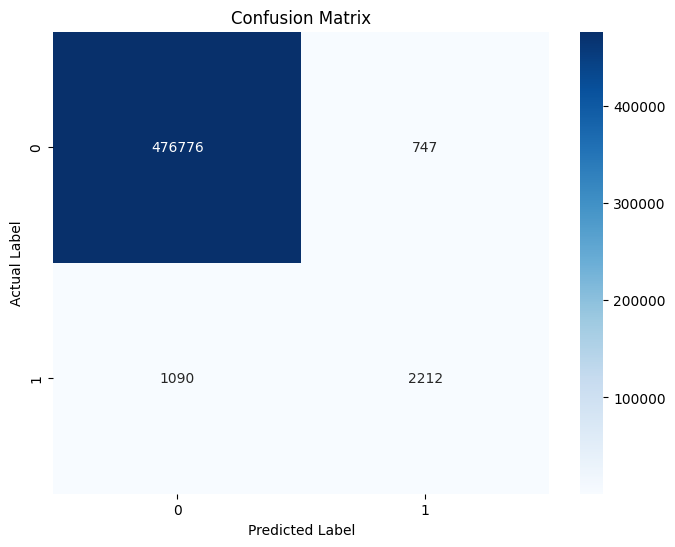

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have your model trained and y_pred calculated
# If not, you would use: y_pred = gb_classifier.predict(X_test)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')  # fmt='g' to avoid scientific notation
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



##Export

In [ ]:
subm

,BORROWER_ID
0,+++b/oYx
1,+++pcjqH
2,+++ukYrT
3,+++wvYn7
4,++/6JzSJ
...,...
1117669,zzzAk2cT
1117670,zzzUlMwd
1117671,zzzf5tKU
1117672,zzzjSsQj


In [ ]:
df_unique = df.drop_duplicates(subset=['BORROWER_ID'], keep='first')
df_unique

,CONTRACT_ID,BORROWER_ID,CONTRACT_CREDIT_LOSS,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_AMOUNT,CONTRACT_MATURITY_DATE,...,TYPE_OF_CUSTOMER_A,SETTLEMENT_0.0,SETTLEMENT_1.0,SETTLEMENT_2.0,SETTLEMENT_3.0,SETTLEMENT_4.0,SETTLEMENT_5.0,SETTLEMENT_6.0,SETTLEMENT_7.0,TARGET_EVENT_BINARY
0,TpK8osXs,d8SqtuEV,0.0,29,0.00,204659.0,22.08,175424.0,192161,775,...,1,0,0,0,0,0,0,0,0,0
1,EtIEHrcH,lrdxML0g,0.0,13,0.00,204659.0,16.57,994868.0,55590,194,...,1,0,0,0,0,0,0,0,0,0
2,1G10DfKj,gII7nnq4,16350.0,20,7.05,127305.0,22.35,282553.0,275924,1507,...,1,0,0,0,0,0,0,0,1,0
3,2NLT774,MMkJ8z/e,0.0,15,0.00,204659.0,0.00,68981.0,138862,322,...,1,0,0,0,0,0,0,0,0,0
4,VpylRvay,M417onFP,2395.0,68,0.00,204659.0,23.92,163319.0,169624,2625,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602724,92C8CC50,POeQToeq,0.0,912,0.00,204659.0,15.00,833470.0,211813,1678,...,1,0,0,0,0,0,0,0,0,0
1602729,F7B15F33,C0amt32x,0.0,649,0.00,204659.0,15.00,833470.0,485818,1748,...,1,0,0,0,0,0,0,0,0,0
1602742,QvDFoc6J,WW5vgE+y,0.0,964,0.00,204659.0,15.00,833470.0,5866242,3531,...,1,0,0,0,0,0,0,0,0,0
1602749,947A5B38,26ZlUKOa,0.0,500,0.00,204659.0,15.00,833470.0,80914,1674,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
merged_data = pd.merge(df_unique, subm, on='BORROWER_ID')
merged_data

,CONTRACT_ID,BORROWER_ID,CONTRACT_CREDIT_LOSS,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_AMOUNT,CONTRACT_MATURITY_DATE,...,TYPE_OF_CUSTOMER_A,SETTLEMENT_0.0,SETTLEMENT_1.0,SETTLEMENT_2.0,SETTLEMENT_3.0,SETTLEMENT_4.0,SETTLEMENT_5.0,SETTLEMENT_6.0,SETTLEMENT_7.0,TARGET_EVENT_BINARY
0,TpK8osXs,d8SqtuEV,0.0,29,0.00,204659.0,22.08,175424.0,192161,775,...,1,0,0,0,0,0,0,0,0,0
1,EtIEHrcH,lrdxML0g,0.0,13,0.00,204659.0,16.57,994868.0,55590,194,...,1,0,0,0,0,0,0,0,0,0
2,1G10DfKj,gII7nnq4,16350.0,20,7.05,127305.0,22.35,282553.0,275924,1507,...,1,0,0,0,0,0,0,0,1,0
3,2NLT774,MMkJ8z/e,0.0,15,0.00,204659.0,0.00,68981.0,138862,322,...,1,0,0,0,0,0,0,0,0,0
4,VpylRvay,M417onFP,2395.0,68,0.00,204659.0,23.92,163319.0,169624,2625,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117669,92C8CC50,POeQToeq,0.0,912,0.00,204659.0,15.00,833470.0,211813,1678,...,1,0,0,0,0,0,0,0,0,0
1117670,F7B15F33,C0amt32x,0.0,649,0.00,204659.0,15.00,833470.0,485818,1748,...,1,0,0,0,0,0,0,0,0,0
1117671,QvDFoc6J,WW5vgE+y,0.0,964,0.00,204659.0,15.00,833470.0,5866242,3531,...,1,0,0,0,0,0,0,0,0,0
1117672,947A5B38,26ZlUKOa,0.0,500,0.00,204659.0,15.00,833470.0,80914,1674,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
sorted_data = merged_data.sort_values(by='BORROWER_ID', ascending=True)
sorted_data = sorted_data.reset_index(drop=True)
sorted_data

,CONTRACT_ID,BORROWER_ID,CONTRACT_CREDIT_LOSS,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_AMOUNT,CONTRACT_MATURITY_DATE,...,TYPE_OF_CUSTOMER_A,SETTLEMENT_0.0,SETTLEMENT_1.0,SETTLEMENT_2.0,SETTLEMENT_3.0,SETTLEMENT_4.0,SETTLEMENT_5.0,SETTLEMENT_6.0,SETTLEMENT_7.0,TARGET_EVENT_BINARY
0,AiEMh4jn,+++b/oYx,2830.0,650,55.21,405165.0,3.02,6232942.0,2873904,1147,...,0,1,0,0,0,0,0,0,0,0
1,9faeiHvv,+++pcjqH,1847.0,658,0.00,0.0,15.38,434066.0,462261,1705,...,0,0,0,0,1,0,0,0,0,0
2,GzigaqD,+++ukYrT,0.0,356,22.67,94702.0,34.92,104717.0,123385,554,...,1,0,0,0,0,0,0,0,0,0
3,-KV3Gph9,+++wvYn7,8496.0,595,0.00,204659.0,0.00,227396.0,221456,922,...,1,0,0,0,0,0,0,0,0,0
4,S0vHKMHj,++/6JzSJ,65308.0,376,50.61,221782.0,23.38,831899.0,824094,2841,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117669,Ves96KK5,zzzAk2cT,0.0,495,0.00,204659.0,15.00,833470.0,343018,891,...,1,0,0,0,0,0,0,0,0,0
1117670,Tqt5eahA,zzzUlMwd,0.0,687,4.96,98725.0,19.67,91187.0,99254,1417,...,1,0,0,0,0,1,0,0,0,0
1117671,WAXMXKXY,zzzf5tKU,155.0,372,25.88,373798.0,7.53,1443130.0,1537324,2238,...,1,0,0,0,0,1,0,0,0,0
1117672,ME99oxv7,zzzjSsQj,1346.0,713,2.57,116514.0,9.87,90025.0,90895,1802,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
submit_GradBoost = sorted_data['BORROWER_ID'].to_frame()
submit_GradBoost

,BORROWER_ID
0,+++b/oYx
1,+++pcjqH
2,+++ukYrT
3,+++wvYn7
4,++/6JzSJ
...,...
1117669,zzzAk2cT
1117670,zzzUlMwd
1117671,zzzf5tKU
1117672,zzzjSsQj


In [ ]:
X = sorted_data.drop(['CONTRACT_ID', 'BORROWER_ID', 'TARGET_EVENT_BINARY'], axis=1)
y = sorted_data['TARGET_EVENT_BINARY'].to_frame

In [ ]:
# Getting probability predictions for each instance in the test set
probability_predictions = gb_classifier.predict_proba(X)

# Since we are interested in the probability of class 1, we select the second column (index 1)
prob_of_event = probability_predictions[:, 1]

# Creating a new DataFrame with the original test data and the probability predictions
submit_GradBoost['PRED'] = prob_of_event


In [ ]:
submit_GradBoost

,BORROWER_ID,PRED
0,+++b/oYx,0.000125
1,+++pcjqH,0.000154
2,+++ukYrT,0.000138
3,+++wvYn7,0.000138
4,++/6JzSJ,0.000323
...,...,...
1117669,zzzAk2cT,0.000138
1117670,zzzUlMwd,0.000138
1117671,zzzf5tKU,0.000139
1117672,zzzjSsQj,0.000175


In [ ]:
submit_GradBoost.to_csv('submit_GradBoost_01.csv', index=False)